In [2]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.10.2 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
#f_root = TFile("BNBCosmicMCStats_pandoraNu_pandoraNu.root")
f_root = TFile("TJPlots/TightMult1hist_pandoraNu_pandoraNu.root")
# itype 1 is cosmic, 2 is neutrino
h0 = f_root.Get("hdEdxVsX_2_2_0") 
h1 = f_root.Get("hdEdxVsX_2_2_1") 
h2 = f_root.Get("hdEdxVsX_2_2_2") 

#print "H1 entries: ", h1.GetEntries()
#print h1
h0_v, edges = rn.hist2array(h0,return_edges=True)
h1_v = rn.hist2array(h1)
h2_v = rn.hist2array(h2)

binsx = (edges[0][:-1] + edges[0][1:])/2
binsy = (edges[1][:-1] + edges[1][1:])/2

print h1_v.shape, edges[0].shape, edges[1].shape, binsx.shape

(40, 100) (41,) (101,) (40,)


In [4]:
x, y = binsx, binsy
display = np.zeros([len(y),len(x)])

dedx_mc_0 = []
x_mc_0 = []

dedx_mc_1 = []
x_mc_1 = []

dedx_mc_2 = []
x_mc_2 = []

for i in xrange(binsx.shape[0]):
    for j in xrange(binsy.shape[0]):
        k = h0_v[i][j]
        while k > 0:
            dedx_mc_0.append(binsy[j])
            x_mc_0.append(binsx[i])
            
            k -= 1

        k = h1_v[i][j]
        while k > 0:
            dedx_mc_1.append(binsy[j])
            x_mc_1.append(binsx[i])
            k -= 1

        k = h2_v[i][j]
        while k > 0:
            dedx_mc_2.append(binsy[j])
            x_mc_2.append(binsx[i])
            k -= 1


In [5]:
import statsmodels.api as sm

#results = sm.OLS(Y,sm.add_constant(X)).fit()
X = x_mc_0
Y = dedx_mc_0
m, b = np.polyfit(X, Y, 1)

X1 = x_mc_1
Y1 = dedx_mc_1
m1, b1 = np.polyfit(X1, Y1, 1)

X2 = x_mc_2
Y2 = dedx_mc_2
m2, b2 = np.polyfit(X2, Y2, 1)

print "Slope0 : %.5f , Intercept : %.2f " %(m, b)
print "Slope1 : %.5f , Intercept : %.2f " %(m1, b1)
print "Slope2 : %.5f , Intercept : %.2f " %(m2, b2)

Slope0 : 0.00002 , Intercept : 2.30 
Slope1 : 0.00191 , Intercept : 2.01 
Slope2 : 0.00089 , Intercept : 1.99 


In [6]:
#http://statsmodels.sourceforge.net/
# Perform an ordinary least squares fit + evaluate influence of points to exclude outliers
import statsmodels.api as sm

UR_fit = sm.add_constant(X)
model = sm.OLS(Y,UR_fit).fit()

influ_v = model.get_influence()
influ_s = influ_v.summary_frame()['student_resid']
outliers = influ_s.ix[abs(influ_s) > .7] # 0.1 Chosen visually

In [7]:
X_n = [ X[i] for i in xrange(len(X)) if i not in outliers]
Y_n = [ Y[i] for i in xrange(len(Y)) if i not in outliers]
m, b = np.polyfit(X_n, Y_n, 1)

print "Slope0 : %.5f , Intercept : %.2f " %(m, b)
print "Outliers : ", len(outliers)
print "X ", len(X_n)

Slope0 : 0.00148 , Intercept : 1.81 
Outliers :  4753
X  13617


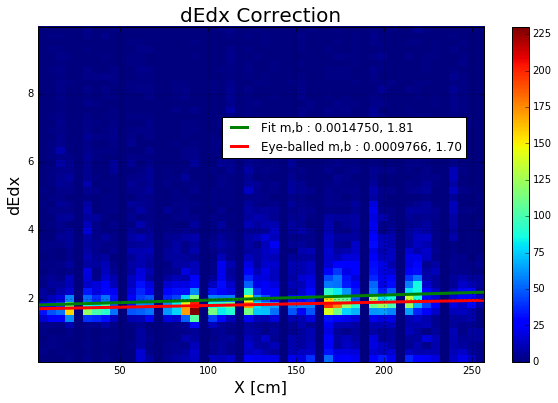

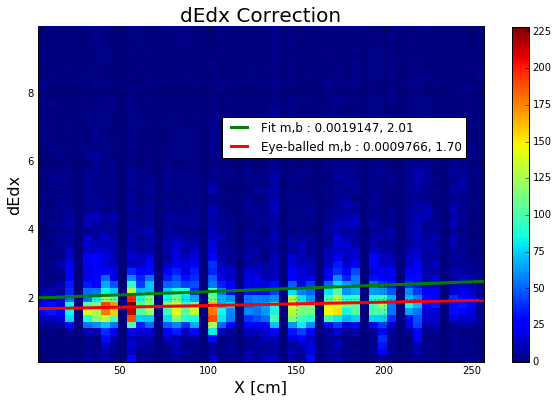

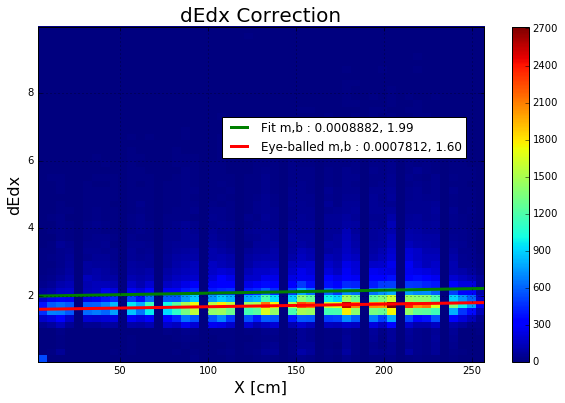

In [8]:
n = 50
X_plot = np.linspace(0,256,100)

X0,X1,Y0,Y1 = 0,256,1.7,1.95
slope0 = (Y1 - Y0)/(X1 - X0)

plt.figure(figsize=(10,6))
plt.hist2d(x_mc_0,dedx_mc_0,bins=n)
plt.plot(X_plot, X_plot*m + b,'g-', lw=3,label='Fit m,b : %.7f, %.2f'%(m,b))
plt.plot((X0,X1),(Y0,Y1),'r-',lw=3,label='Eye-balled m,b : %.7f, %.2f'%(slope0,Y0))
plt.grid(True)
plt.colorbar()
#plt.text(100,8,'Slope : %.4f, Intercept : %.3f' % (slope0,Y0),\
#         bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},fontsize=16)
plt.title("dEdx Correction",fontsize=20)
plt.legend(loc='upper left',bbox_to_anchor=(.4,0.75))
plt.xlabel("X [cm]",fontsize=16)
plt.ylabel("dEdx",fontsize=16)

plt.figure(figsize=(10,6))
plt.hist2d(x_mc_1,dedx_mc_1,bins=n)
plt.plot(X_plot, X_plot*m1 + b1,'g-', lw=3,label='Fit m,b : %.7f, %.2f'%(m1,b1))
plt.plot((X0,X1),(Y0,Y1),'r-',lw=3,label='Eye-balled m,b : %.7f, %.2f'%(slope0,Y0))
plt.grid(True)
plt.colorbar()
plt.title("dEdx Correction",fontsize=20)
plt.xlabel("X [cm]",fontsize=16)
plt.ylabel("dEdx",fontsize=16)
plt.legend(loc='upper left',bbox_to_anchor=(.4,0.75))

Y0_2,Y1_2 = 1.6,1.8
slope2 = (Y1_2 - Y0_2)/(X1 - X0)

plt.figure(figsize=(10,6))
plt.hist2d(x_mc_2,dedx_mc_2,bins=n)
plt.plot(X_plot, X_plot*m2 + b2,'g-', lw=3,label='Fit m,b : %.7f, %.2f'%(m2,b2))
plt.plot((X0,X1),(Y0_2,Y1_2),'r-',lw=3,label='Eye-balled m,b : %.7f, %.2f'%(slope2,Y0_2))
plt.grid(True)
plt.colorbar()
plt.title("dEdx Correction",fontsize=20)
plt.xlabel("X [cm]",fontsize=16)
plt.ylabel("dEdx",fontsize=16)
plt.legend(loc='upper left',bbox_to_anchor=(.4,0.75))


In [9]:
f_root = TFile("TESTdata_pandoraNu_pandoraNu.root")
# itype 1 is cosmic, 2 is neutrino
h0 = f_root.Get("hdEdxVsX_2_0_0") 
h1 = f_root.Get("hdEdxVsX_2_0_1") 
h2 = f_root.Get("hdEdxVsX_2_0_2") 

#print "H1 entries: ", h1.GetEntries()
#print h1
h0_v, edges = rn.hist2array(h0,return_edges=True)
h1_v = rn.hist2array(h1)
h2_v = rn.hist2array(h2)

binsx = (edges[0][:-1] + edges[0][1:])/2
binsy = (edges[1][:-1] + edges[1][1:])/2

print h1_v.shape, edges[0].shape, edges[1].shape, binsx.shape

(40, 100) (41,) (101,) (40,)


In [114]:
x, y = binsx, binsy
display = np.zeros([len(y),len(x)])

dedx_mc_0 = []
x_mc_0 = []

dedx_mc_1 = []
x_mc_1 = []

dedx_mc_2 = []
x_mc_2 = []

for i in xrange(binsx.shape[0]):
    for j in xrange(binsy.shape[0]):
        k = h0_v[i][j]
        while k > 0:
            dedx_mc_0.append(binsy[j])
            x_mc_0.append(binsx[i])
            
            k -= 1

        k = h1_v[i][j]
        while k > 0:
            dedx_mc_1.append(binsy[j])
            x_mc_1.append(binsx[i])
            k -= 1

        k = h2_v[i][j]
        while k > 0:
            dedx_mc_2.append(binsy[j])
            x_mc_2.append(binsx[i])
            k -= 1


In [115]:
import statsmodels.api as sm

#results = sm.OLS(Y,sm.add_constant(X)).fit()
X = x_mc_0
Y = dedx_mc_0
m, b = np.polyfit(X, Y, 1)

X1 = x_mc_1
Y1 = dedx_mc_1
m1, b1 = np.polyfit(X1, Y1, 1)

X2 = x_mc_2
Y2 = dedx_mc_2
m2, b2 = np.polyfit(X2, Y2, 1)

print "Slope0 : %.5f , Intercept : %.2f " %(m, b)
print "Slope1 : %.5f , Intercept : %.2f " %(m1, b1)
print "Slope2 : %.5f , Intercept : %.2f " %(m2, b2)

Slope0 : -0.00095 , Intercept : 1.85 
Slope1 : 0.00145 , Intercept : 3.19 
Slope2 : 0.00071 , Intercept : 1.81 


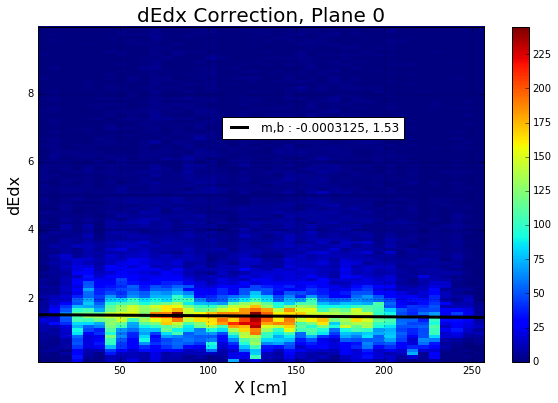

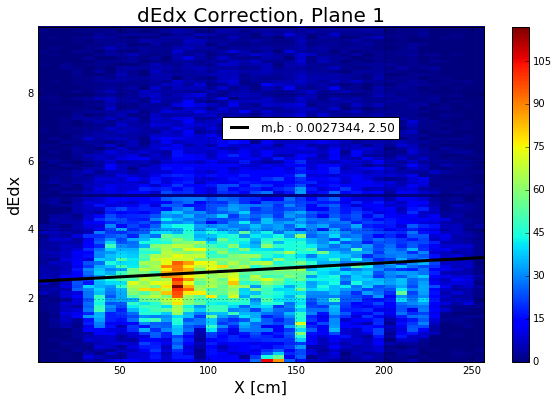

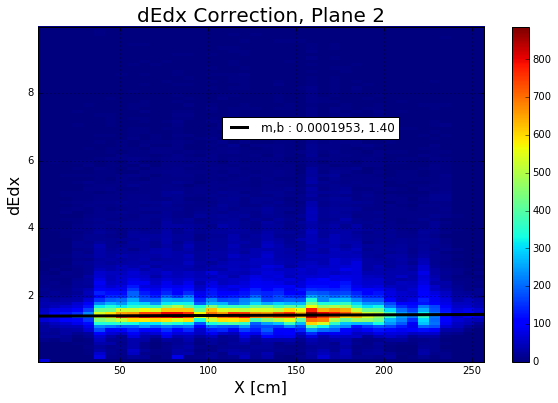

In [139]:
nx, ny = 40,100
X_plot = np.linspace(0,256,100)

X0,X1,Y0,Y1 = 0,256,1.53,1.45
slope0 = (Y1 - Y0)/(X1 - X0)

plt.figure(figsize=(10,6))
plt.hist2d(x_mc_0,dedx_mc_0,bins=(nx,ny))
#plt.plot(X_plot, X_plot*m + b,'g-', lw=3,label='Fit m,b : %.7f, %.2f'%(m,b))
plt.plot((X0,X1),(Y0,Y1),'k-',lw=3,label='m,b : %.7f, %.2f'%(slope0,Y0))
plt.grid(True)
plt.colorbar()
plt.title("dEdx Correction, Plane 0",fontsize=20)
plt.legend(loc='upper left',bbox_to_anchor=(.4,0.75))
plt.xlabel("X [cm]",fontsize=16)
plt.ylabel("dEdx",fontsize=16)

Y0_1,Y1_1 = 2.5, 3.2
slope1 = (Y1_1 - Y0_1)/(X1 - X0)

plt.figure(figsize=(10,6))
plt.hist2d(x_mc_1,dedx_mc_1,bins=(nx,ny))
#plt.plot(X_plot, X_plot*m1 + b1,'g-', lw=3,label='Fit m,b : %.7f, %.2f'%(m1,b1))
plt.plot((X0,X1),(Y0_1,Y1_1),'k-',lw=3,label='m,b : %.7f, %.2f'%(slope1,Y0_1))
plt.grid(True)
plt.colorbar()
plt.title("dEdx Correction, Plane 1",fontsize=20)
plt.xlabel("X [cm]",fontsize=16)
plt.ylabel("dEdx",fontsize=16)
plt.legend(loc='upper left',bbox_to_anchor=(.4,0.75))

Y0_2,Y1_2 = 1.4,1.45
slope2 = (Y1_2 - Y0_2)/(X1 - X0)

plt.figure(figsize=(10,6))
plt.hist2d(x_mc_2,dedx_mc_2,bins=(nx,ny))
#=plt.plot(X_plot, X_plot*m2 + b2,'g-', lw=3,label='Fit m,b : %.7f, %.2f'%(m2,b2))
plt.plot((X0,X1),(Y0_2,Y1_2),'k-',lw=3,label='m,b : %.7f, %.2f'%(slope2,Y0_2))
plt.grid(True)
plt.colorbar()
plt.title("dEdx Correction, Plane 2",fontsize=20)
plt.xlabel("X [cm]",fontsize=16)
plt.ylabel("dEdx",fontsize=16)
plt.legend(loc='upper left',bbox_to_anchor=(.4,0.75))
